In [1]:
import utils as u
import librosa
import soundfile as sf
import os
import numpy as np

In [2]:
train_labels_path = '/teamspace/studios/this_studio/jap_aug_train_labels.txt'
val_labels_path = '/teamspace/studios/this_studio/jap_val_labels.txt'
test_labels_path = '/teamspace/studios/this_studio/jap_test_labels.txt'

In [3]:
with open(train_labels_path, 'r') as file:
    train_labels = file.readlines()

train_labels = [label.strip() for label in train_labels]

In [4]:
print(train_labels)

['bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bonafide', 'bo

In [5]:
with open(val_labels_path, 'r') as file:
    val_labels = file.readlines()

val_labels = [label.strip() for label in val_labels]

In [6]:
print(val_labels)

['deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'de

In [7]:
with open(test_labels_path, 'r') as file:
    test_labels = file.readlines()

test_labels = [label.strip() for label in test_labels]

In [8]:
print(test_labels)

['deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'deepfake', 'de

In [9]:
def process_file(file_path):
    features, _ = u.load_and_extract_features([file_path], feature_type='lfcc')
    return features

In [10]:
train_data_path = '/teamspace/studios/this_studio/jap_aug_LFCC_features.npy'
val_data_path = '/teamspace/studios/this_studio/jap_LFCC_features_val.npy'
test_data_path = '/teamspace/studios/this_studio/jap_LFCC_features_test.npy'

In [11]:
train_data_feature = np.load(train_data_path)
val_data_feature = np.load(val_data_path)
test_data_feature = np.load(test_data_path)

In [12]:
train_data_feature = train_data_feature[..., np.newaxis]
val_data_feature = val_data_feature[..., np.newaxis]

In [13]:
train_data_feature_1 = np.array(train_data_feature, dtype=float)
val_data_feature_1 = np.array(val_data_feature, dtype=float)

In [14]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

In [15]:
train_labels = np.where(train_labels == 'deepfake', 1, 0)
val_labels = np.where(val_labels == 'deepfake', 1, 0)
test_labels = np.where(test_labels == 'deepfake', 1, 0)

In [16]:
print("Train data shape:", train_data_feature_1.shape)
print("Train labels shape:", train_labels.shape)
print("Validation data shape:", val_data_feature_1.shape)
print("Validation labels shape:", val_labels.shape)

Train data shape: (19712, 13, 1643, 1)
Train labels shape: (19712,)
Validation data shape: (1937, 13, 606, 1)
Validation labels shape: (1937,)


In [17]:
import numpy as np

def pad_features(features, target_length):
    """ Pad multiple feature arrays along the time axis to a target length, preserving the channel dimension.
    
    Args:
        features (np.array): Feature arrays with shape (num_features, 13, variable_length, 1).
        target_length (int): The target length to pad the time dimension to.

    Returns:
        np.array: Padded features with shape (num_features, 13, target_length, 1).
    """
    num_features, num_channels, _, num_dims = features.shape
    if num_channels != 13 or num_dims != 1:
        raise ValueError("Each feature must have shape (13, variable_length, 1)")
    
    # Initialize the padded features array
    padded_features = np.zeros((num_features, 13, target_length, 1), dtype=features.dtype)
    
    # Pad each feature array
    for i in range(num_features):
        sequence_length = features[i].shape[1]
        if sequence_length > target_length:
            padded_features[i, :, :target_length, :] = features[i, :, :target_length, :]
        else:
            padded_features[i, :, :sequence_length, :] = features[i]
    
    return padded_features



In [18]:
padded_val_data_feature = pad_features(val_data_feature_1, 1643)

In [19]:
print("Number of training samples:", len(train_data_feature_1))
print("Number of training labels:", len(train_labels))

print("Number of validation features:", len(padded_val_data_feature))
print("Number of validation labels:", len(val_labels))

Number of training samples: 19712
Number of training labels: 19712
Number of validation features: 1937
Number of validation labels: 1937


In [20]:
input_shape = test_data_feature.shape 
from models import build_model
model = build_model(input_shape)
model.summary()

2024-05-01 19:33:32.831605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 19:33:32.971088: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/amazon/efa/lib:/opt/aws-ofi-nccl/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-05-01 19:33:32.971115: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-01 19:33:33.008626: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 1643, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 1643, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 1643, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 1643, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 1643, 64)       16448     
                                                                 
 flatten (Flatten)           (None, 315456)            0

2024-05-01 19:33:34.505772: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-01 19:33:34.506013: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/amazon/efa/lib:/opt/aws-ofi-nccl/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-05-01 19:33:34.506066: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/amazon/efa/lib:/opt/aws-ofi-nccl/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-05-01 19:33:34.506114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynam

In [22]:
import keras
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"checkpoints/audio_convnet.keras",
        save_best_only=True,
        monitor="val_loss")
]

batch_size = 32
history = model.fit(
        x=train_data_feature_1,
        y=train_labels, 
        validation_data=(padded_val_data_feature, val_labels),
        epochs=10,
        batch_size=batch_size,
        callbacks=callbacks)

Epoch 1/10
616/616 [==============================] - 184s 298ms/step - loss: 0.4088 - accuracy: 0.8544 - val_loss: 1.7587 - val_accuracy: 0.4868
Epoch 2/10
616/616 [==============================] - 182s 295ms/step - loss: 0.2363 - accuracy: 0.8968 - val_loss: 1.2806 - val_accuracy: 0.5008
Epoch 3/10
616/616 [==============================] - 181s 294ms/step - loss: 0.1911 - accuracy: 0.9192 - val_loss: 1.6898 - val_accuracy: 0.4982
Epoch 4/10
616/616 [==============================] - 181s 294ms/step - loss: 0.1504 - accuracy: 0.9370 - val_loss: 1.7204 - val_accuracy: 0.5075
Epoch 5/10
616/616 [==============================] - 181s 294ms/step - loss: 0.1120 - accuracy: 0.9539 - val_loss: 2.4521 - val_accuracy: 0.5116
Epoch 6/10
616/616 [==============================] - 181s 293ms/step - loss: 0.0870 - accuracy: 0.9665 - val_loss: 3.1534 - val_accuracy: 0.4889
Epoch 7/10
616/616 [==============================] - 182s 296ms/step - loss: 0.0635 - accuracy: 0.9755 - val_loss: 3.3677 -

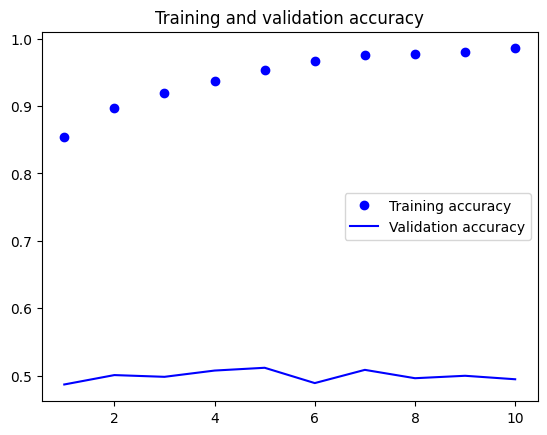

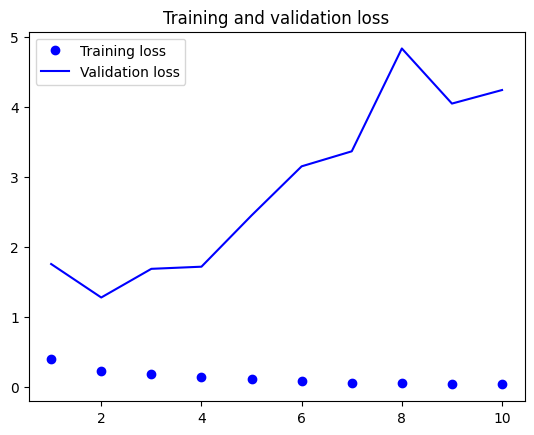

In [23]:
u.plot_loss(history)

In [21]:
import keras
model_reloaded = keras.models.load_model("checkpoints/audio_convnet.keras")


In [22]:
print(test_data_feature)

[[[-6.22628288e+01 -6.38156297e+01 -7.45304273e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-6.42742324e+00  1.10281557e+00 -1.10844999e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.25949707e+01  6.66800039e+00  2.09558047e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 1.00960393e+01  1.58111308e+00  6.13124298e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 9.13308131e-01 -6.00892518e+00 -1.49667050e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-4.09191555e+00 -1.86646757e+01 -1.72336316e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[-7.30914692e+01 -6.51301468e+01 -6.18897799e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-1.74034529e+01 -4.75415861e+00 -8.53353265e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 5.73962407e+00  4.41240651e+00  3.29871275e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [-9.30050727e+00 -9.8

In [23]:
test_data_feature = test_data_feature[..., np.newaxis]

In [24]:
padded_test_data_feature = pad_features(test_data_feature, 1643)

In [25]:
from sklearn.metrics import roc_curve
from keras.models import load_model
model = load_model('/teamspace/studios/this_studio/checkpoints/audio_convnet.keras')

In [26]:
X_test = padded_test_data_feature 
y_test = test_labels
batch_size = 32
# Evaluate the model on the test set
test_loss, test_accuracy = model_reloaded.evaluate(X_test, y_test, batch_size=batch_size)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

60/60 [==============================] - 3s 55ms/step - loss: 1.2651 - accuracy: 0.4979
Test Loss: 1.2651, Test Accuracy: 0.4979


In [27]:
print(y_test)

[1 1 1 ... 0 0 0]


In [28]:
predictions = model.predict(padded_test_data_feature)

60/60 [==============================] - 3s 53ms/step


In [29]:
print(f'Length of y_labels: {len(y_test)}')
print(f'Length of predictions: {len(predictions)}')

# If lengths differ, find out if any specific entries are missing
if len(y_test) != len(predictions):
    print("Mismatch in array lengths detected. Investigating further...")

Length of y_labels: 1896
Length of predictions: 1896


In [32]:
eer, threshold = u.calculate_eer(y_test, predictions)
print(f"EER: {eer:.2%}, Threshold: {threshold}")


EER: 50.11%, Threshold: 0.5203359127044678


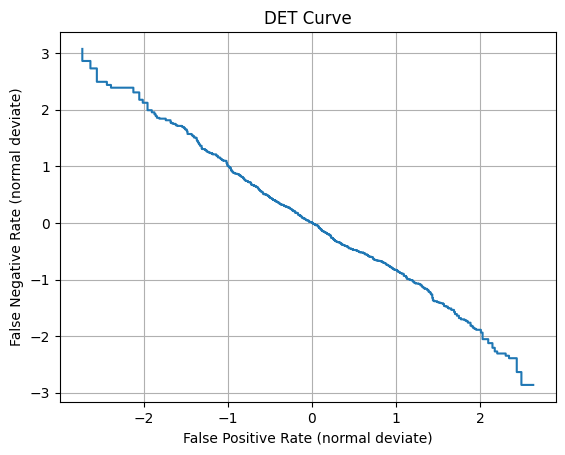

In [51]:
u.plot_det_curve(y_test, predictions)